In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Reuters dataset

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

Prepping data

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Building the network

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Validating

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 48ms/step - loss: 3.0970 - accuracy: 0.3753 - val_loss: 1.7537 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.5146 - accuracy: 0.6899 - val_loss: 1.3166 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 25ms/step - loss: 1.0759 - accuracy: 0.7725 - val_loss: 1.1611 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8533 - accuracy: 0.8134 - val_loss: 1.0606 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6835 - accuracy: 0.8576 - val_loss: 1.0034 - val_accuracy: 0.7760
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5476 - accuracy: 0.8817 - val_loss: 0.9608 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4354 - accuracy: 0.9105 - val_loss: 0.9282 - val_accuracy: 0.8120
Epoch 8/20
16

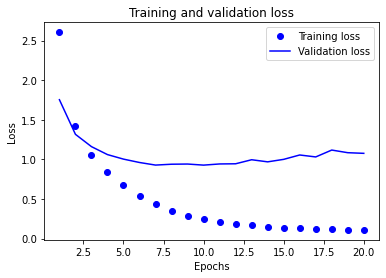

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

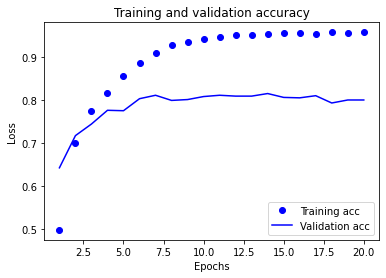

In [18]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 35ms/step - loss: 3.2447 - accuracy: 0.4053 - val_loss: 1.8412 - val_accuracy: 0.6320
Epoch 2/8
16/16 [==============================] - 0s 15ms/step - loss: 1.5961 - accuracy: 0.6802 - val_loss: 1.3230 - val_accuracy: 0.7140
Epoch 3/8
16/16 [==============================] - 0s 17ms/step - loss: 1.1124 - accuracy: 0.7683 - val_loss: 1.1379 - val_accuracy: 0.7540
Epoch 4/8
16/16 [==============================] - 0s 16ms/step - loss: 0.8631 - accuracy: 0.8205 - val_loss: 1.0269 - val_accuracy: 0.7800
Epoch 5/8
16/16 [==============================] - 0s 14ms/step - loss: 0.6828 - accuracy: 0.8590 - val_loss: 0.9512 - val_accuracy: 0.8040
Epoch 6/8
16/16 [==============================] - 0s 15ms/step - loss: 0.5431 - accuracy: 0.8867 - val_loss: 0.9093 - val_accuracy: 0.8100
Epoch 7/8
16/16 [==============================] - 0s 16ms/step - loss: 0.4236 - accuracy: 0.9132 - val_loss: 0.8856 - val_accuracy: 0.8210
Epoch 8/8
71/71 [===

In [20]:
results

[0.9565813541412354, 0.7920747995376587]

In [21]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19100623330365094

Generating predictions on new data

In [22]:
predictions = model.predict(x_test)

In [23]:
predictions[0].shape

(46,)

In [24]:
np.sum(predictions[0])

0.9999999

In [25]:
np.argmax(predictions[0])

3

Labels and the Loss

In [26]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [27]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 3.3516 - accuracy: 0.0987 - val_loss: 2.1968 - val_accuracy: 0.5680
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 1.8768 - accuracy: 0.5943 - val_loss: 1.5330 - val_accuracy: 0.6340
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3543 - accuracy: 0.6684 - val_loss: 1.3802 - val_accuracy: 0.6800
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1463 - accuracy: 0.7190 - val_loss: 1.3370 - val_accuracy: 0.6840
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0146 - accuracy: 0.7419 - val_loss: 1.3078 - val_accuracy: 0.7030
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.9463 - accuracy: 0.7506 - val_loss: 1.3061 - val_accuracy: 0.7110
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.8637 - accuracy: 0.7743 - val_loss: 1.3189 - val_accuracy: 0.7140
Epoch 8/20
63/63 [=